# Revenda de veículos usados

Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from scipy.stats import friedmanchisquare

from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [2]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer


In [3]:
veiculos_usados = pd.read_csv('/content/cars_train_estatistico.csv', sep=',')

# informações sobre o conjunto de dados
veiculos_usados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296 entries, 0 to 26295
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                26296 non-null  int64  
 1   marca                    26296 non-null  object 
 2   modelo                   26296 non-null  object 
 3   versao                   26296 non-null  object 
 4   ano_de_fabricacao        26296 non-null  int64  
 5   ano_modelo               26296 non-null  int64  
 6   hodometro                26296 non-null  float64
 7   cambio                   26296 non-null  object 
 8   num_portas               26296 non-null  int64  
 9   tipo                     26296 non-null  object 
 10  blindado                 26296 non-null  bool   
 11  cor                      26296 non-null  object 
 12  tipo_vendedor            26296 non-null  object 
 13  cidade_vendedor          26296 non-null  object 
 14  estado_vendedor       

In [4]:
veiculos_usados_teste = pd.read_csv('/content/cars_test.csv',sep='\t', encoding='utf_16')

# informações sobre o conjunto de dados
veiculos_usados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296 entries, 0 to 26295
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                26296 non-null  int64  
 1   marca                    26296 non-null  object 
 2   modelo                   26296 non-null  object 
 3   versao                   26296 non-null  object 
 4   ano_de_fabricacao        26296 non-null  int64  
 5   ano_modelo               26296 non-null  int64  
 6   hodometro                26296 non-null  float64
 7   cambio                   26296 non-null  object 
 8   num_portas               26296 non-null  int64  
 9   tipo                     26296 non-null  object 
 10  blindado                 26296 non-null  bool   
 11  cor                      26296 non-null  object 
 12  tipo_vendedor            26296 non-null  object 
 13  cidade_vendedor          26296 non-null  object 
 14  estado_vendedor       

## Pré processamento

- Valores faltantes: feito no arquivo da análise estatística
- Dados categóricos
- Normalização dos dados

**Dados categóricos**

Convertendo dados nominais para numéricos

In [5]:
encoder = LabelEncoder()
veiculos_usados['marca'] = encoder.fit_transform(veiculos_usados['marca'])
veiculos_usados['modelo'] = encoder.fit_transform(veiculos_usados['modelo'])
veiculos_usados['versao'] = encoder.fit_transform(veiculos_usados['versao'])
veiculos_usados['cambio'] = encoder.fit_transform(veiculos_usados['cambio'])
veiculos_usados['tipo'] = encoder.fit_transform(veiculos_usados['tipo'])
veiculos_usados['blindado'] = encoder.fit_transform(veiculos_usados['blindado'])
veiculos_usados['cor'] = encoder.fit_transform(veiculos_usados['cor'])
veiculos_usados['tipo_vendedor'] = encoder.fit_transform(veiculos_usados['tipo_vendedor'])
veiculos_usados['estado_vendedor'] = encoder.fit_transform(veiculos_usados['estado_vendedor'])
veiculos_usados['cidade_vendedor'] = encoder.fit_transform(veiculos_usados['cidade_vendedor'])
veiculos_usados['troca'] = encoder.fit_transform(veiculos_usados['troca'])
veiculos_usados['dono_aceita_troca'] = encoder.fit_transform(veiculos_usados['dono_aceita_troca'])
veiculos_usados['veiculo_único_dono'] = encoder.fit_transform(veiculos_usados['veiculo_único_dono'])
veiculos_usados['revisoes_concessionaria'] = encoder.fit_transform(veiculos_usados['revisoes_concessionaria'])
veiculos_usados['ipva_pago'] = encoder.fit_transform(veiculos_usados['ipva_pago'])
veiculos_usados['veiculo_licenciado'] = encoder.fit_transform(veiculos_usados['veiculo_licenciado'])
veiculos_usados['garantia_de_fábrica'] = encoder.fit_transform(veiculos_usados['garantia_de_fábrica'])
veiculos_usados['revisoes_dentro_agenda'] = encoder.fit_transform(veiculos_usados['revisoes_dentro_agenda'])
veiculos_usados['entrega_delivery'] = encoder.fit_transform(veiculos_usados['entrega_delivery'])
veiculos_usados['anunciante'] = encoder.fit_transform(veiculos_usados['anunciante'])
veiculos_usados.head(15)

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,entrega_delivery,troca,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,revisoes_dentro_agenda,dono_aceita_troca,ipva_pago,veiculo_licenciado,preco
0,8,23,216,390,2017,2017,67772.0,4,4,5,...,0,0,0,1,0,0,0,1,1,74732.59
1,8,14,111,769,2017,2017,62979.0,2,4,5,...,0,0,0,0,0,0,1,1,0,81965.33
2,16,15,315,1240,2018,2019,44070.0,2,4,5,...,1,0,0,0,0,0,1,0,0,162824.81
3,13,10,195,31,2017,2018,85314.0,5,4,5,...,1,1,0,0,0,0,1,0,0,51325.85
4,14,9,97,776,2019,2019,27834.0,4,4,5,...,1,1,0,0,0,0,1,0,0,97366.80
5,15,9,157,294,2016,2017,95054.0,2,4,1,...,0,0,0,0,0,0,1,0,0,46263.04
6,8,34,352,107,2017,2018,39987.0,5,4,5,...,0,0,1,1,1,1,0,1,1,75088.72
7,15,32,198,1320,2019,2020,43328.0,2,4,6,...,0,0,1,0,0,0,1,1,1,218634.94
8,16,0,278,1114,2014,2014,96528.0,2,4,6,...,1,1,0,0,0,0,1,0,0,226024.87
9,8,14,111,769,2019,2019,60682.0,2,4,5,...,0,0,0,0,0,0,1,1,1,73785.15


In [6]:
veiculos_usados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296 entries, 0 to 26295
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                26296 non-null  int64  
 1   marca                    26296 non-null  int64  
 2   modelo                   26296 non-null  int64  
 3   versao                   26296 non-null  int64  
 4   ano_de_fabricacao        26296 non-null  int64  
 5   ano_modelo               26296 non-null  int64  
 6   hodometro                26296 non-null  float64
 7   cambio                   26296 non-null  int64  
 8   num_portas               26296 non-null  int64  
 9   tipo                     26296 non-null  int64  
 10  blindado                 26296 non-null  int64  
 11  cor                      26296 non-null  int64  
 12  tipo_vendedor            26296 non-null  int64  
 13  cidade_vendedor          26296 non-null  int64  
 14  estado_vendedor       

Removendo o atributo *ano de fabricação*, pois de acordo com a Fipe, na hora da venda o que se deve levar em conta é o *ano modelo*.

Referência: https://autopapo.uol.com.br/noticia/venda-de-carros-usados-ano-modelo-preco-tabela/


In [8]:
veiculos_usados.drop(['ano_de_fabricacao'], axis='columns', inplace=True)

Separando em treino e teste

In [9]:
## split data
veiculos_train, veiculos_test = model_selection.train_test_split(veiculos_usados, test_size=0.3)
## print info
print("X_train shape:", veiculos_train.drop("preco",axis=1).shape, "| X_test shape:", veiculos_test.drop("preco",axis=1).shape)
print("y_train mean:", round(np.mean(veiculos_train["preco"]),2), "| y_test mean:", round(np.mean(veiculos_test["preco"]),2))
print(veiculos_train.shape[1], "features:", veiculos_train.drop("preco",axis=1).columns.to_list())

X_train shape: (18407, 24) | X_test shape: (7889, 24)
y_train mean: 138227.87 | y_test mean: 135520.69
25 features: ['num_fotos', 'marca', 'modelo', 'versao', 'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'dono_aceita_troca', 'ipva_pago', 'veiculo_licenciado']


**Normalização**

Para problemas de regressão, pode-se transformar as variáveis de entrada e de saída. O RobustScaler transforma a *feature* subtraindo a mediana e depois dividindo pelo intervalo interquartil (valor de 75% - valor de 25%). A vantagem desse scaler é que ele é menos afetado por outliers

In [10]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(veiculos_train.drop("preco", axis=1))
veiculos_scaled = pd.DataFrame(X, columns=veiculos_train.drop("preco", axis=1).columns, index=veiculos_train.index)
veiculos_scaled

,num_fotos,marca,modelo,versao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,anunciante,entrega_delivery,troca,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,revisoes_dentro_agenda,dono_aceita_troca,ipva_pago,veiculo_licenciado
6503,0.000000,0.444444,-1.118343,-0.524183,0.000000,0.667089,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-1.0,0.0,-1.0
7310,1.000000,0.355556,0.402367,0.920261,-0.333333,0.676736,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
24796,2.000000,0.533333,-1.082840,1.090196,1.000000,-0.815884,0.0,0.0,-1.0,0.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
13478,0.000000,0.088889,-0.408284,0.901961,0.333333,-0.579309,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0
13365,0.000000,0.888889,-0.047337,-0.247059,1.000000,-0.085953,3.0,0.0,0.0,0.0,...,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220,0.166667,-0.488889,0.366864,-0.840523,1.000000,-0.189791,0.0,0.0,-4.0,0.0,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25489,0.000000,0.000000,-0.497041,0.013072,0.333333,-0.245288,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,-1.0
7682,1.333333,-0.177778,0.065089,0.281046,-0.333333,0.038568,0.0,0.0,0.0,0.0,...,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13845,1.333333,-0.311111,-0.455621,-0.084967,0.666667,-0.206346,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
veiculos_scaled['preco'] = scalerY.fit_transform(veiculos_train['preco'].values.reshape(-1,1))
veiculos_scaled.head()

,num_fotos,marca,modelo,versao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,revisoes_dentro_agenda,dono_aceita_troca,ipva_pago,veiculo_licenciado,preco
6503,0.0,0.444444,-1.118343,-0.524183,0.000000,0.667089,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,-1.0,0.0,-1.0,-0.877888
7310,1.0,0.355556,0.402367,0.920261,-0.333333,0.676736,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.232882
24796,2.0,0.533333,-1.082840,1.090196,1.000000,-0.815884,0.0,0.0,-1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.109733
13478,0.0,0.088889,-0.408284,0.901961,0.333333,-0.579309,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0,2.102835
13365,0.0,0.888889,-0.047337,-0.247059,1.000000,-0.085953,3.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.683750


**Seleção de *features***

A seleção de *features* é o processo de selecionar um subconjunto de variáveis relevantes para construir o modelo de aprendizado de máquina.

In [12]:
corr_matrix = veiculos_train.corr(method="pearson")
corr_matrix

,num_fotos,marca,modelo,versao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,veiculo_único_dono,revisoes_concessionaria,garantia_de_fábrica,revisoes_dentro_agenda,dono_aceita_troca,ipva_pago,veiculo_licenciado,preco
num_fotos,1.000000,0.001710,0.045953,-0.060075,0.000896,0.053439,0.012005,0.004619,-0.023643,-0.018644,...,0.539508,0.485629,-0.135302,-0.293194,-0.213378,-0.292442,0.382310,-0.325910,-0.173642,-0.029186
marca,0.001710,1.000000,-0.026617,0.023643,0.037274,-0.051350,-0.061813,0.041073,-0.090272,-0.006894,...,0.013338,0.024202,-0.010856,-0.018550,-0.000650,-0.041032,0.001430,0.002588,0.008937,0.053344
modelo,0.045953,-0.026617,1.000000,-0.052965,0.005778,0.005695,0.144261,-0.061088,-0.046920,0.029517,...,0.030706,0.040038,0.017235,-0.023591,0.013634,-0.018042,-0.010350,-0.036969,-0.030101,-0.071464
versao,-0.060075,0.023643,-0.052965,1.000000,-0.344151,0.142658,-0.339209,-0.057152,0.265120,0.088516,...,-0.115169,-0.074919,-0.193887,0.158113,-0.023637,0.124148,0.031836,-0.075563,-0.107177,0.505385
ano_modelo,0.000896,0.037274,0.005778,-0.344151,1.000000,-0.774854,0.056472,0.058416,0.041326,-0.063792,...,0.058596,0.015905,0.490843,0.015641,0.382393,-0.017965,-0.017615,0.114294,0.131929,0.145447
hodometro,0.053439,-0.051350,0.005695,0.142658,-0.774854,1.000000,0.075663,-0.030645,-0.123221,0.012473,...,0.033087,0.041077,-0.427200,-0.172028,-0.481619,-0.118531,0.104997,-0.096200,-0.108386,-0.323136
cambio,0.012005,-0.061813,0.144261,-0.339209,0.056472,0.075663,1.000000,-0.111160,-0.255683,-0.037461,...,0.063488,0.042746,0.059943,-0.099059,-0.035559,-0.075626,-0.024745,0.028923,0.036929,-0.306147
num_portas,0.004619,0.041073,-0.061088,-0.057152,0.058416,-0.030645,-0.111160,1.000000,0.032896,0.013263,...,0.010386,0.007411,0.007713,0.006131,0.022683,-0.003559,-0.026078,0.019171,0.016368,-0.079884
tipo,-0.023643,-0.090272,-0.046920,0.265120,0.041326,-0.123221,-0.255683,0.032896,1.000000,0.061689,...,-0.048280,-0.039640,0.035907,0.078746,0.077696,0.056445,0.019136,-0.017874,-0.023149,0.266321
blindado,-0.018644,-0.006894,0.029517,0.088516,-0.063792,0.012473,-0.037461,0.013263,0.061689,1.000000,...,-0.026355,-0.019182,-0.017731,0.037512,-0.011431,0.028829,0.010516,0.047920,0.064035,0.106326


Text(0.5, 1.0, 'pearson correlation')

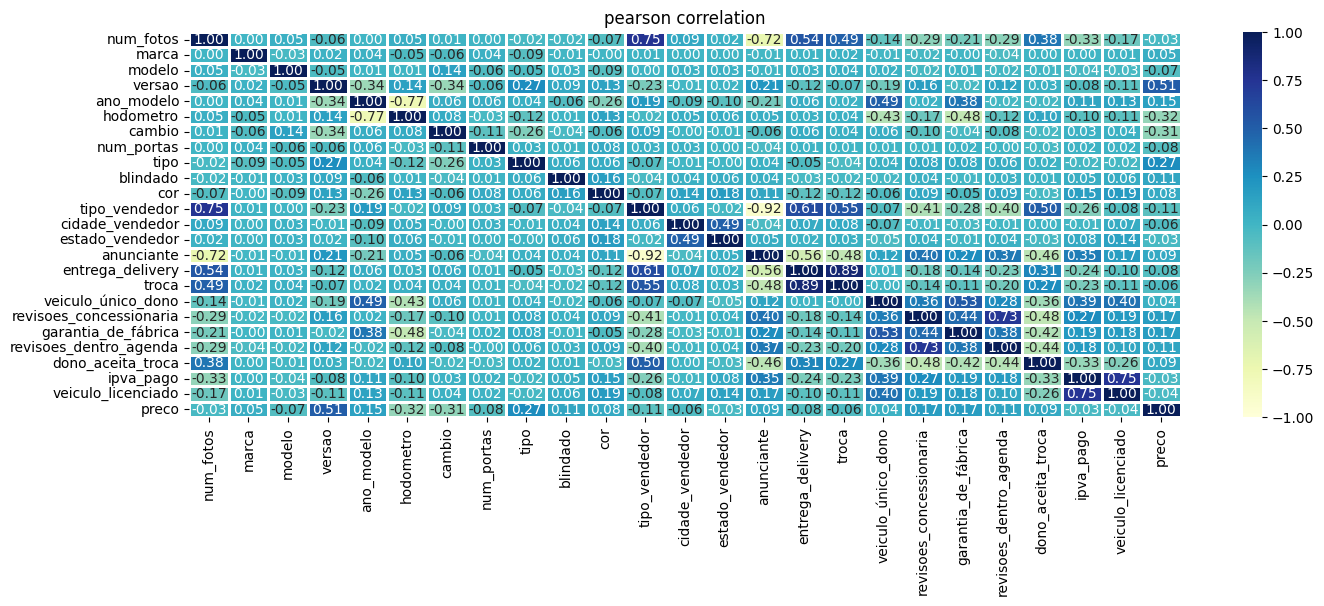

In [17]:
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=2)
plt.title("pearson correlation")